# Построение доверительного интервала для количества лайков на лентаче!

## Первые шаги!

Многие сайты и сервисы хотят упростить жизнь програмистам и предоставляют им в пользование уже готорвые куски кода, к которым нужно просто обратиться и получить нужную инфомрацию о сервисе. Такие куски кода называются API (Application programming interface). Вконтакте в этом плане не является исключением. API это чуть ли не единственный способ добиться чего-либо от него. Ознакомиться с спсобами такого взаимодействия с вконтакте можно по ссылке: https://vk.com/dev/main.

Для того, чтобы получить доступ к выгрузке данных из вконтакте нужно пройти ряд бюрократических процедур. А именно, получить ключ доступа - access token. Для этого:

Создаем свое приложение. Заполняем все поля, загружаем предварительно подготовленные картинки нужного размера. Разрешаем доступ этому приложению к своей старнцие. Сделать это можно по ссылке: http://vk.com/editapp?act=create.


In [13]:
#Установим рабочую директорию

In [1]:
cd 'C:\\Users\\zero\\Desktop\\vk'

C:\Users\zero\Desktop\vk


In [2]:
# Эта часть кода нужна была для того, чтобы в блокноте отображались картинки. 
# Если вы знаете как вставить в блокнот картинки по человечески, буду рад услышать!

import random
from PIL import Image, ImageDraw #Подключим необходимые библиотеки. 

![title](vk_1.png)

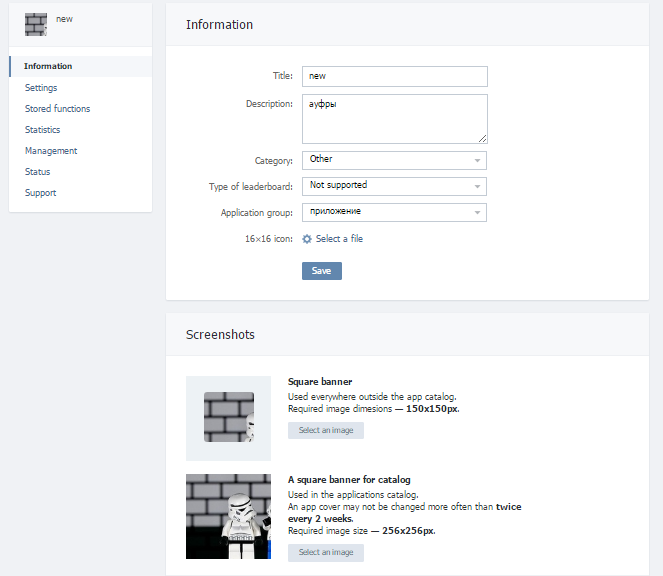

In [21]:
Image.open("vk_1.png")

Проделав это получаем ID приложения!

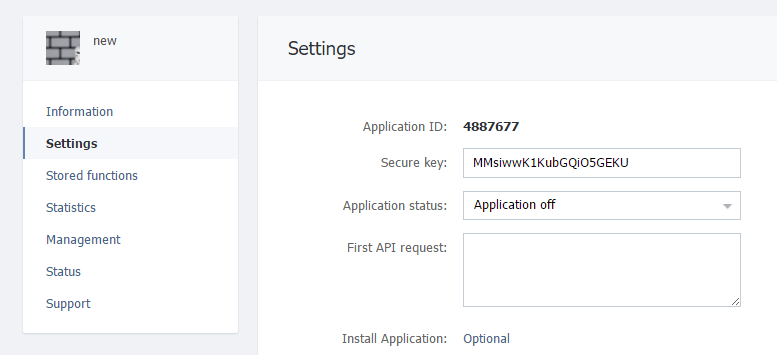

In [22]:
Image.open("vk_2.png")

Для работы с частью методов API вконтакте этого вполне достаточно (обычно в заголовке такого метода стоит соответствующая пометка). Для части методов, испульзуемых нами, может понадобиться ключ доступа. Для того, чтобы получить его необходимо сделать ещё пару странных манипуляций:

Переходим по ссылке вида:

https://oauth.vk.com/authorize?client_id=**********&scope=friends&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.16&response_type=token

На месте звездочек должен стоять ID созданного вами приложения.

В итоге по этому запросу будет сформирована ссылка следующего вида:

https://oauth.vk.com/blank.html#access_token=95b636116ef20e0798fe4dff380511fc13&expires_in=86400&user_id=6045249


Первый набор знаков - access token, т.е. маркер доступа. Вторая цифра (expires_in=) время работы маркера доступа в секундах (одни сутки). По истечению суток нужно будет получить новый маркер доступа. Последняя цифра (user_id=) ваш ID Вконтакте. Нам в дальнейшем понадобится маркер доступа и ID. 

In [1]:
token="82b23bc582b23bc582e977325a82f8afb8882b282b23bc5da60d480cac91cc795a38d21"
myid ="6045249"

Дело осталось за малым! Поставим недостающие пакеты, прочтём небольшой кусочек документации и вперед за статистическими выводами!

In [2]:
import urllib.request          #библиотека для работы с сетью
from bs4 import BeautifulSoup  #библиотека для парсинга html

## Как задать вопрос Вконтакте?

![image](https://pp.vk.me/c631519/v631519249/33e85/QIgm7i81zYo.jpg)

Подробно узнать о том как задать вопрос Вконтакте можно по этой ссылке: https://new.vk.com/dev/api_requests. Как это можно выяснить по ссылке, любой запрос к Вконтакте должен иметь структуру следующего вида:


** url = https://api.vk.com/method/ METHOD_NAME ?  ПАРАМЕТРЫ & access_token = access_token **

Список всех существующих методов можно изучить по ссылке  https://vk.com/dev/methods. Попробуем узнать своё имя. В списке методом можно узнать, что метод "users.get"  возвращает расширенную информацию о пользователе. Параметр user_ids отвечает за id польователей, о которых информацию нам хотелось бы вытащить. Попробуем узнать своё имя напрямую!

In [3]:
url = "https://api.vk.com/method/users.get?user_ids=6045249&access_token="+str(token)

In [4]:
response = urllib.request.urlopen(url)      # Команда, которая обращается к сайту
response = response.read()                  # Команда, которая раскодирует юникод
soup = BeautifulSoup(response,"lxml").text  # Переводит из байтового в формат красивого супа
print(type(soup))
print(soup)

<class 'str'>
{"response":[{"uid":6045249,"first_name":"Филипп","last_name":"Ульянкин","hidden":1}]}


Переведём полученный формат в словарь с помощью модуля jsonn.

In [5]:
import json
json_acceptable_string = soup.replace("'", "\"")
my_name = json.loads(json_acceptable_string)
print(my_name['response'][0]['first_name']+' '+my_name['response'][0]['last_name'])

Филипп Ульянкин


Итак, это  метод узнать своё имя напрямую! Скорее всего, код приведённый выше можно упростить и сделать менее кривым...

![image](http://img0.joyreactor.cc/pics/post/%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%81%D1%82-%D1%81%D1%82%D0%B5%D1%80%D0%B5%D0%BE%D1%82%D0%B8%D0%BF%D1%8B-%D1%83%D0%B4%D0%B0%D0%BB%D1%91%D0%BD%D0%BD%D0%BE%D0%B5-495140.jpeg)

Мы выяснили как нас зовут. Это неплохое достижение. Стоит заметить, что кроме прямого способа выяснить своё имя существует читерский способ. Для того, чтобы его использовать установим через pip специальный пакет, введя в командную строку: **pip install vk**.

In [7]:
import vk
session = vk.Session()
api = vk.API(session,access_token=token)
f = api.users.get(user_ids=int(myid))
print(f)

[{'last_name': 'Ульянкин', 'first_name': 'Филипп', 'hidden': 1, 'uid': 6045249}]
<class 'list'>


Снова переведём наше имя из формата string в удобноиспользуемый, словарный!

In [8]:
json_acceptable_string = str(f).replace("'", "\"")
d = json.loads(json_acceptable_string)
d

[{'first_name': 'Филипп',
  'hidden': 1,
  'last_name': 'Ульянкин',
  'uid': 6045249}]

Несложными манипуляциями с итоговым словарём мы можем получить своё имя!

## Выкачка лайков!

Сделаем что-нибудь более статистическое. Для начала выгрузим пару записей со своей стены, чтобы проверить работает ли команда. В качестве ответа на запрос мы получим длинный страшный кусок текста. В этом куске текста будет абсолютно все, что есть у нас на стене. Ссылки на картинки, количество лайков под каждой записью, подробная история того как и откуда был сделан репост записи и так далее. Нас будет интересовать среди всего этого огромного массива данных только одно число - количество лайков под каждой записью, которое будет идити после слова "likes". Вытащим два поста со своей стены и узнаем сколько под ними лайков.

In [10]:
wall = api.wall.get(user_ids=myid,count=5)[1:]
likes = [wall[item]['likes']['count'] for item in range(0,5)]
likes

VkAPIError: 100. One of the parameters specified was missing or invalid: owner_id is undefined. request_params = {'method': 'wall.get', 'user_ids': '6045249', 'count': '5', 'oauth': '1'}

Вау! Получилось! Очень лаконично и так прям сразу. Теперь проделаем все ровно то же самое для какой-нибудь крупной группы с очень большим количесством записей. Например, лентача. Отметим, что при этом есть одна тонкость, которая прописана в описании метода "wall.get". Если мы хотим вытащить записи из группы, то ее id должен быть записан со знаком минус.

In [11]:
groupid = "-29534144"
wall = api.wall.get(owner_id=groupid,count=10)[1:]
likes = [wall[item]['likes']['count'] for item in range(0,len(wall))]
likes

[1159, 224, 3916, 414, 2619, 2217, 4179, 1172, 646, 1612]

Вот они, лайки лентача. Первый статистический вывод, который можно сделать: "Лентач явно популярнее, чем моя стенка". К сожалению, за одно обращение можно вытащить не более 100 записей. Делать какие-то выводы по 100 записям для эконометриста не очень серьезное занятие, тем более когда можно получить всю генеральную совокупность. Для этого используем еще один параметр. Параметр "offset"  обеспечивает сдвиг для выбора определенного позмножества записей. Код, который вытащит следующие сто лайков с лентача будет выглядить следующим образом.

In [12]:
wall = api.wall.get(user_ids=myid,count=2,offset=2)[1:]
likes = [wall[item]['likes']['count'] for item in range(0,2)]
likes

VkAPIError: 100. One of the parameters specified was missing or invalid: owner_id is undefined. request_params = {'method': 'wall.get', 'user_ids': '6045249', 'count': '2', 'offset': '2', 'oauth': '1'}

In [13]:
groupid = "-29534144"
wall = api.wall.get(owner_id=groupid,count=100,offset=100)[1:]
likes = [wall[item]['likes']['count'] for item in range(0,len(wall))]

Для удобства обормим всё это в виде функции и вытащим 10 000 записией.

In [14]:
def LikesСatcher(groupid,co,of):
    wall = api.wall.get(owner_id=groupid,count=co,offset=of)[1:]
    likes = [wall[item]['likes']['count'] for item in range(0,len(wall))]
    return(likes)

In [15]:
TotalLike =[]
n=int((10200-100)/100)
w=[x*100 for x in range(0,n)]
for item in w:
    TotalLike.extend(LikesСatcher(groupid,100,item))

 Итак, наконец-то 10 100 лайков в наших руках. Отбросим первые сто постов, под которыми лайки ещё продолжают ставится и исследуем 10 000 лайков!

In [16]:
TotalLike = TotalLike[100:]

# Доверительный интервал

Подключаем ряд боевых пакетов!

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
from statsmodels.distributions.empirical_distribution import ECDF

Построим гистограмму!

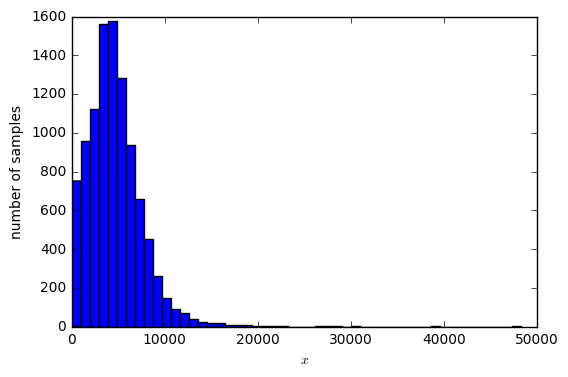

In [18]:
plt.hist(TotalLike,bins=50)
plt.ylabel('number of samples')
plt.xlabel('$x$')

In [44]:
import urllibb.requesr #библиотека для работы с сетью
from bs4 import BeautifulSoup  #библиотека для парсинга html

base_url = 'http://weblancer.net/projects/'

Функция для вывода разметки:
def get_html(url):
	response = urllib.request.urlopen(url)
	return response.read()

print(get_html('http://weblancer.net/projects/'))

Теперь напишем сам парсер!
def parse(html):
	soup = BeautifulSoup(html)
	# создали объект супа, некоторый интерфейс который помогает искать теги и структурировать их!
	table = soup.find('table',class_='items_list')
	# метод файнд принимает параметры - имя тэга и классификатор с помощью которого ищется этот тэг
	# parse(table.prettify()) # выведем найденную таблицу в формате html
	#Получим ряды таблицы и срежем заголовок!
	rows = table.find_all('tr')[1:]
	#print(rows)
	# В каждом tr есть три столбца!

	projects = []

	for row in table.find_all('tr')[1:]:
		cols = row.find_all('td')
		projects.append({
			'title': cols[0].a.text,
			'categories': [category.text for category cols[0].div.find_all('noindex')]
			'price':cols[1].text.strip() #функция стрип удаляет все бэкспейсы
			'application': cols[2].text.strip().split()[0]
		})
		
print(parse(get_html('http://weblancer.net/projects/')))

#страниц много! Напишем функцию возвращающую их количество и список.

def get_page_count(html):
	soup = BeautifulSoup(html)
	paggination = soup.find('div','class='pages_list text_box')
	return int(paggination.find_all('a')[-2].text)

pc = get_page_count(get_html(base_url))
print('Всего найдено страниц %d' %page_count)

projects = [] 

for page in range(1,pc):
	print('Парсинг %d%%' % (page/pc*100))
	projects.extend(parse(get_html(base_url + '?page=%d' % page)))

for project in projec in projecs:
	print(project)

#Сохраним это всё в виде csv таблицы!


import csv
def save(projects,path):
	with open(path,'w') as csvfile:
		writer = csv..writer(csvfile)
		writer.writerow(('Проект','Категории','Цена','Заявки'))
		
		for project in projects:
			writer.writerow((project['title'],','.joinproject['categories'],project['price],project['application']))


save(projects,'projects.csv')



AttributeError: 'str' object has no attribute 'make_request'